In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.cluster import KMeans

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
data=pd.read_csv("/content/sample_data/customer_segmentation.csv")

In [8]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [10]:
data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [11]:
data.dropna(inplace=True)

In [12]:
data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [13]:
x=data[["Income","Recency","MntWines","MntFruits","MntMeatProducts"]]

In [14]:
scaler=StandardScaler()

In [16]:
x_scaled=scaler.fit_transform(x)

In [17]:
kmeans=KMeans(n_clusters=4,random_state=0)

In [18]:
data["Cluster"]=kmeans.fit_predict(x_scaled)

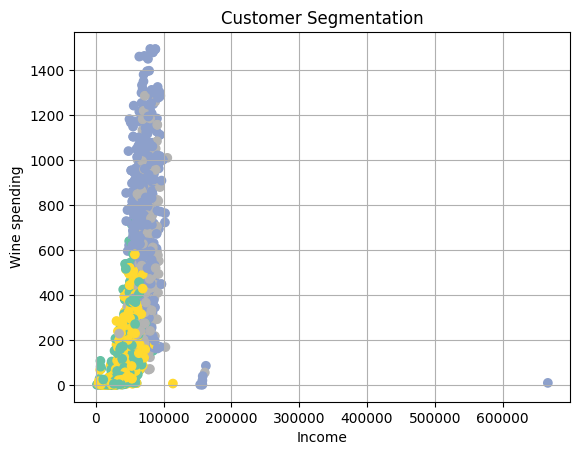

In [19]:
plt.scatter(data["Income"],data["MntWines"],c=data["Cluster"],cmap="Set2")
plt.xlabel("Income")
plt.ylabel("Wine spending")
plt.title("Customer Segmentation")
plt.grid(True)
plt.show()

In [20]:
data.to_csv("customer_segmented_output.csv",index=False)

In [21]:
from google.colab import files
files.download("customer_segmented_output.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
data=pd.read_csv("/content/sample_data/customer_segmented_output.csv")

In [23]:
data.head(1000)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,3
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,2
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,1
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,2
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,8975,1968,Graduation,Married,19514.0,1,1,26-01-2014,47,14,...,1,0,0,0,0,0,3,11,0,0
996,6119,1963,PhD,Single,36736.0,1,1,10-05-2013,52,10,...,0,0,0,0,0,0,3,11,0,0
997,5236,1979,Graduation,Together,77568.0,0,1,25-08-2012,30,1230,...,0,1,1,1,0,0,3,11,0,1
998,5723,1976,PhD,Together,49187.0,0,1,11-01-2014,63,81,...,0,0,0,0,0,0,3,11,0,0


In [24]:
data.to_csv("ouput.csv",index=False)

In [25]:
from google.colab import files
files.download("ouput.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
plt.savefig("customer segmentation_plot.png")
plt.show()

<Figure size 640x480 with 0 Axes>

In [27]:
from google.colab import files
files.download("customer segmentation_plot.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>